In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/d/uahmad12/covid-19/Provisional_COVID-19_death_counts_and_rates_by_month__jurisdiction_of_residence__and_demographic_characteristics.csv


In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
df = pd.read_csv('/kaggle/input/d/uahmad12/covid-19/Provisional_COVID-19_death_counts_and_rates_by_month__jurisdiction_of_residence__and_demographic_characteristics.csv')


In [6]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,data_as_of,jurisdiction_residence,year,month,group,subgroup1,subgroup2,COVID_deaths,crude_COVID_rate,aa_COVID_rate,crude_COVID_rate_ann,aa_COVID_rate_ann,footnote
0,07/10/2025 12:00:00 AM,United States,2020,1,Sex,Female,NaN,3.0,NaN,NaN,NaN,NaN,Rates for death counts <20 are unreliable.
1,07/10/2025 12:00:00 AM,United States,2020,1,Sex,Male,NaN,3.0,NaN,NaN,NaN,NaN,Rates for death counts <20 are unreliable.
2,07/10/2025 12:00:00 AM,United States,2020,1,Age,0-4 years,NaN,0.0,0.0,NaN,0.0,NaN,NaN
3,07/10/2025 12:00:00 AM,United States,2020,1,Age,12-17 years,NaN,0.0,0.0,NaN,0.0,NaN,NaN
4,07/10/2025 12:00:00 AM,United States,2020,1,Age,18-29 years,NaN,0.0,0.0,NaN,0.0,NaN,NaN


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58806 entries, 0 to 58805
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   data_as_of              58806 non-null  object 
 1   jurisdiction_residence  58806 non-null  object 
 2   year                    58806 non-null  int64  
 3   month                   58806 non-null  int64  
 4   group                   58806 non-null  object 
 5   subgroup1               58806 non-null  object 
 6   subgroup2               45738 non-null  object 
 7   COVID_deaths            44954 non-null  float64
 8   crude_COVID_rate        40267 non-null  float64
 9   aa_COVID_rate           4706 non-null   float64
 10  crude_COVID_rate_ann    40267 non-null  float64
 11  aa_COVID_rate_ann       4706 non-null   float64
 12  footnote                18539 non-null  object 
dtypes: float64(5), int64(2), object(6)
memory usage: 5.8+ MB
None


In [8]:
df.describe ()

,year,month,COVID_deaths,crude_COVID_rate,aa_COVID_rate,crude_COVID_rate_ann,aa_COVID_rate_ann
count,58806.000000,58806.000000,44954.000000,40267.000000,4706.000000,40267.000000,4706.000000
mean,2022.272727,6.227273,220.842839,7.049398,5.454675,84.591211,65.472312
std,1.600633,3.441292,1549.287284,31.522626,9.514571,378.273443,114.170040
min,2020.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2021.000000,3.000000,0.000000,0.000000,0.700000,0.000000,7.900000
50%,2022.000000,6.000000,0.000000,0.000000,2.000000,0.000000,24.300000
75%,2024.000000,9.000000,31.000000,1.600000,5.800000,19.200000,69.600000
max,2025.000000,12.000000,67990.000000,1466.300000,162.400000,17595.600000,1948.800000


In [9]:
# making the data set for time series analysis 
import pandas as pd
df['date_new'] = pd.to_datetime(df['year']*100 + df['month'], format='%Y%m')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58806 entries, 0 to 58805
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   data_as_of              58806 non-null  object        
 1   jurisdiction_residence  58806 non-null  object        
 2   year                    58806 non-null  int64         
 3   month                   58806 non-null  int64         
 4   group                   58806 non-null  object        
 5   subgroup1               58806 non-null  object        
 6   subgroup2               45738 non-null  object        
 7   COVID_deaths            44954 non-null  float64       
 8   crude_COVID_rate        40267 non-null  float64       
 9   aa_COVID_rate           4706 non-null   float64       
 10  crude_COVID_rate_ann    40267 non-null  float64       
 11  aa_COVID_rate_ann       4706 non-null   float64       
 12  footnote                18539 non-null  object

In [11]:
# making it ready for time series analysis  
print(df['jurisdiction_residence'].value_counts())
print(df['group'].value_counts())
print(df['subgroup1'].value_counts())

jurisdiction_residence
United States    5346
Region 1         5346
Region 2         5346
Region 3         5346
Region 4         5346
Region 5         5346
Region 6         5346
Region 7         5346
Region 8         5346
Region 9         5346
Region 10        5346
Name: count, dtype: int64
group
Race and Age    45738
Age              6534
Race             5082
Sex              1452
Name: count, dtype: int64
subgroup1
Non-Hispanic White                                               7260
Non-Hispanic Native Hawaiian or Other Pacific Islander           7260
Non-Hispanic Black                                               7260
Non-Hispanic Asian, Native Hawaiian or Other Pacific Islander    7260
Non-Hispanic Asian                                               7260
Non-Hispanic American Indian or Alaska Native                    7260
Hispanic                                                         7260
Male                                                              726
75 years and over  

In [12]:
print(df[['COVID_deaths', 'crude_COVID_rate']].isna().sum())
# to see that where the value is missing 
print(df[df['COVID_deaths'].isna()][['year', 'month', 'jurisdiction_residence', 'group', 'subgroup1']].head())

COVID_deaths        13852
crude_COVID_rate    18539
dtype: int64
     year  month jurisdiction_residence         group           subgroup1
163  2020      1               Region 2           Sex                Male
171  2020      1               Region 2           Age         65-74 years
179  2020      1               Region 2          Race  Non-Hispanic White
241  2020      1               Region 2  Race and Age  Non-Hispanic White
325  2020      1               Region 4           Sex                Male


In [13]:
print(df[df['COVID_deaths'].isna()]['footnote'].value_counts())

footnote
Death counts between 1-9 are suppressed. Rates for death counts <20 are unreliable.    13852
Name: count, dtype: int64


In [14]:
df.set_index('date_new', inplace=True)


In [15]:
# now handle the missing values 
# so first agregate columns COVID_deaths by jurisdiction_residence and date for time serreis analysis 
# actually forming the new data set 
import pandas as pd
df_agg = df.groupby(['jurisdiction_residence', 'date_new'])['COVID_deaths'].sum().reset_index()
print(df_agg.head())
print("Missing COVID_deaths after aggregation:", df_agg['COVID_deaths'].isna().sum())


  jurisdiction_residence   date_new  COVID_deaths
0               Region 1 2020-01-01           0.0
1               Region 1 2020-02-01           0.0
2               Region 1 2020-03-01        1097.0
3               Region 1 2020-04-01       27595.0
4               Region 1 2020-05-01       21080.0
Missing COVID_deaths after aggregation: 0


In [16]:
# pivot data

df_pivot = df_agg.pivot(index='date_new', columns='jurisdiction_residence', values='COVID_deaths')
print(df_pivot.head())
print("Missing values by region:", df_pivot.isna().sum())

jurisdiction_residence  Region 1  Region 10  Region 2  Region 3  Region 4  \
date_new                                                                    
2020-01-01                   0.0        0.0       0.0       0.0       0.0   
2020-02-01                   0.0        0.0       0.0       0.0       0.0   
2020-03-01                1097.0     1350.0   14703.0     932.0    2393.0   
2020-04-01               27595.0     2896.0  127840.0   24255.0   16593.0   
2020-05-01               21080.0     1418.0   36737.0   22829.0   16424.0   

jurisdiction_residence  Region 5  Region 6  Region 7  Region 8  Region 9  \
date_new                                                                   
2020-01-01                   0.0       0.0       0.0       0.0       0.0   
2020-02-01                   0.0       0.0       0.0       0.0       0.0   
2020-03-01                3922.0    2129.0     217.0     441.0    1520.0   
2020-04-01               36362.0   11910.0    3265.0    3944.0   11438.0   
2020

In [17]:
#agregate crude Covid rate  by mean taking 
df_agg_rate = df.groupby(['jurisdiction_residence', 'date_new'])['crude_COVID_rate'].mean().reset_index()
print("Missing crude_COVID_rate after aggregation:", df_agg_rate['crude_COVID_rate'].isna().sum())

Missing crude_COVID_rate after aggregation: 0


In [18]:
# again checking the missing  values 
print(df_agg[df_agg['COVID_deaths'].isna()][['jurisdiction_residence', 'date_new']])

Empty DataFrame
Columns: [jurisdiction_residence, date_new]
Index: []


In [19]:
df_agg_rate = df.groupby(['jurisdiction_residence', 'date_new'])['crude_COVID_rate'].mean().reset_index()
print(df_agg_rate.head())
print("Missing crude_COVID_rate after aggregation:", df_agg_rate['crude_COVID_rate'].isna().sum())

  jurisdiction_residence   date_new  crude_COVID_rate
0               Region 1 2020-01-01          0.000000
1               Region 1 2020-02-01          0.000000
2               Region 1 2020-03-01          0.921053
3               Region 1 2020-04-01         73.683333
4               Region 1 2020-05-01         51.331579
Missing crude_COVID_rate after aggregation: 0


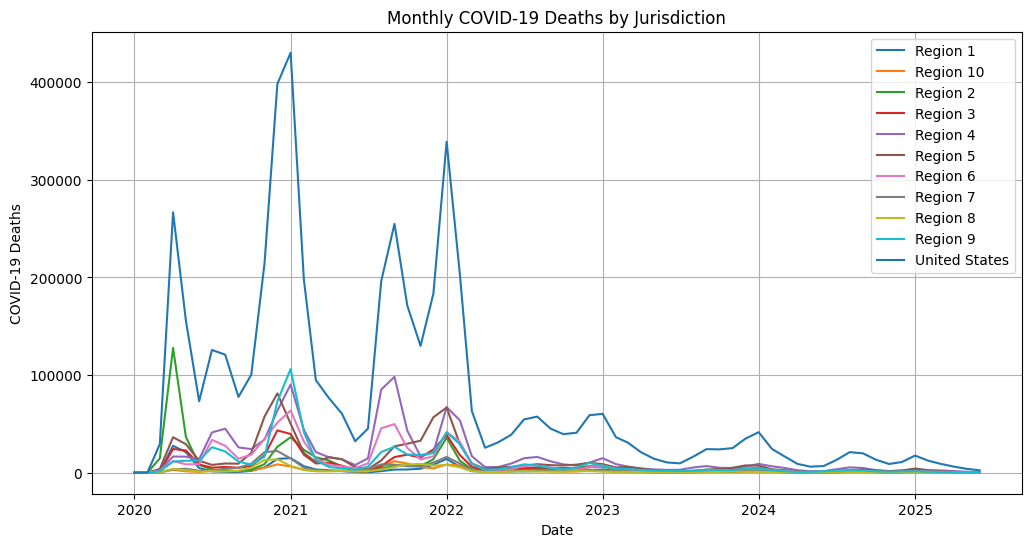

In [20]:
#now vissulize the data set 
# monthly pattren covid deaths 
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
for column in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[column], label=column)
plt.title('Monthly COVID-19 Deaths by Jurisdiction')
plt.xlabel('Date')
plt.ylabel('COVID-19 Deaths')
plt.legend()
plt.grid(True)
plt.show()


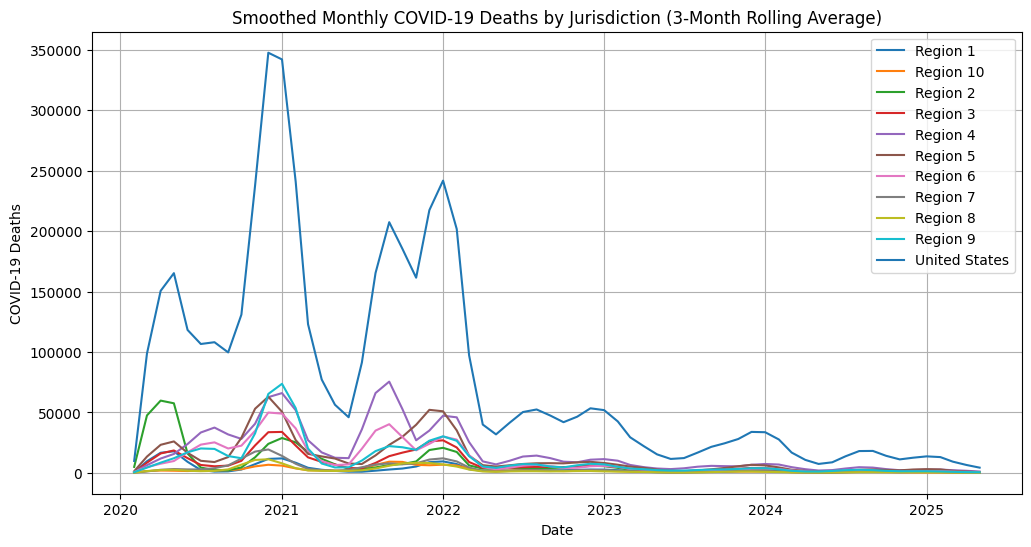

In [21]:
#smooth trend for wave identification >> (3 months rolling avg)

df_pivot_smooth = df_pivot.rolling(window=3, center=True).mean()
plt.figure(figsize=(12, 6))
for column in df_pivot_smooth.columns:
    plt.plot(df_pivot_smooth.index, df_pivot_smooth[column], label=column)
plt.title('Smoothed Monthly COVID-19 Deaths by Jurisdiction (3-Month Rolling Average)')
plt.xlabel('Date')
plt.ylabel('COVID-19 Deaths')
plt.legend()
plt.grid(True)
plt.show()

jurisdiction_residence  Region 1  Region 10  Region 2  Region 3  Region 4  \
date_new                                                                    
2020-03-31                1097.0     1350.0   14703.0     932.0    2393.0   
2020-06-30               53390.0     5179.0  172609.0   55505.0   46794.0   
2020-09-30                3101.0     6112.0    6495.0   16183.0  112302.0   
2020-12-31               21473.0    15943.0   38488.0   68007.0  121785.0   
2021-03-31               25031.0    10934.0   75619.0   67683.0  155537.0   

jurisdiction_residence  Region 5  Region 6  Region 7  Region 8  Region 9  \
date_new                                                                   
2020-03-31                3922.0    2129.0     217.0     441.0    1520.0   
2020-06-30               77914.0   29243.0    9295.0    7578.0   36206.0   
2020-09-30               26749.0   75610.0   11468.0    4834.0   59376.0   
2020-12-31              159091.0  104300.0   52660.0   31953.0   97865.0   
2021

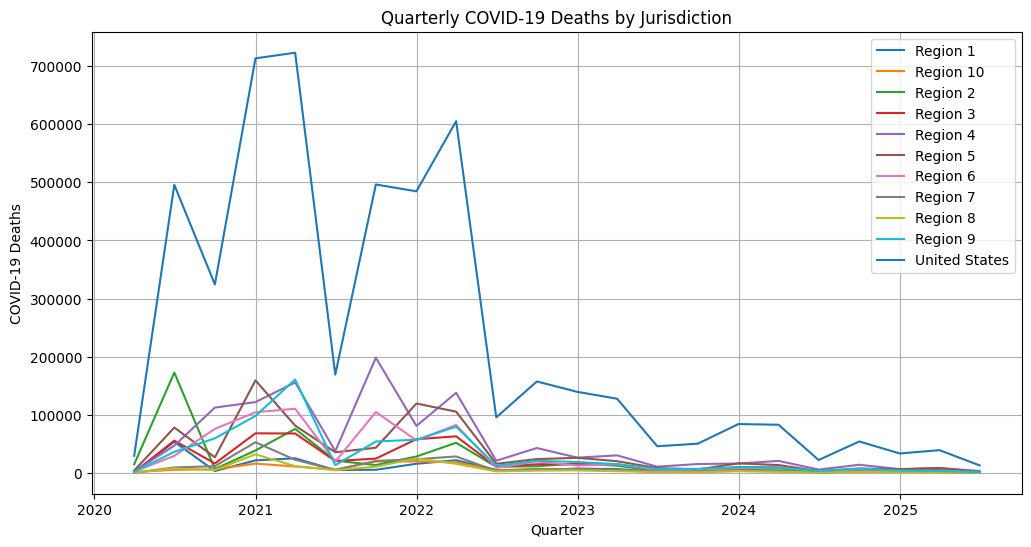

In [22]:
# Quartly pattren in covid deaths 

df_quarterly = df_pivot.resample('QE').sum()
print(df_quarterly.head())
plt.figure(figsize=(12, 6))
for column in df_quarterly.columns:
    plt.plot(df_quarterly.index, df_quarterly[column], label=column)
plt.title('Quarterly COVID-19 Deaths by Jurisdiction')
plt.xlabel('Quarter')
plt.ylabel('COVID-19 Deaths')
plt.legend()
plt.grid(True)
plt.show()

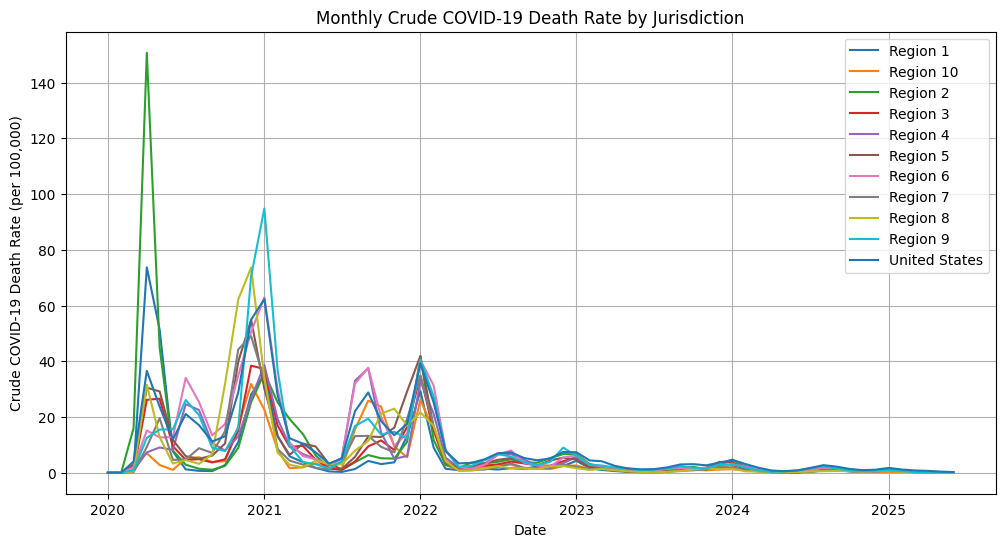

In [23]:
#4. Monthly Patterns in crude_COVID_rate

df_pivot_rate = df_agg_rate.pivot(index='date_new', columns='jurisdiction_residence', values='crude_COVID_rate')
plt.figure(figsize=(12, 6))
for column in df_pivot_rate.columns:
    plt.plot(df_pivot_rate.index, df_pivot_rate[column], label=column)
plt.title('Monthly Crude COVID-19 Death Rate by Jurisdiction')
plt.xlabel('Date')
plt.ylabel('Crude COVID-19 Death Rate (per 100,000)')
plt.legend()
plt.grid(True)
plt.show()

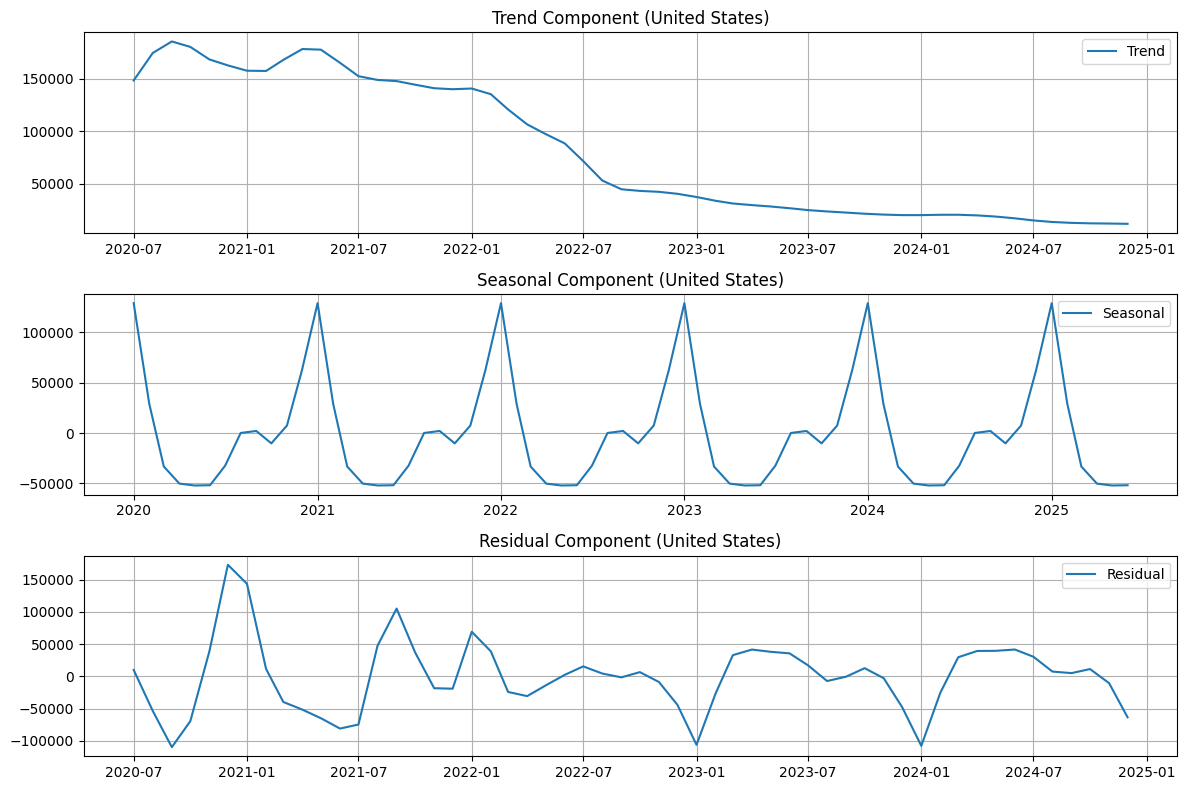

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose


# 5. Seasonality Analysis for COVID_deaths (United States)
# Use seasonal decomposition for the national data (United States)
# Assuming monthly data, set period=12 for annual seasonality
us_deaths = df_pivot['United States'].dropna()
decomposition = seasonal_decompose(us_deaths, model='additive', period=12)

# Plot decomposition components (trend, seasonal, residual)
plt.figure(figsize=(12, 8))
plt.subplot(311)
plt.plot(decomposition.trend, label='Trend')
plt.title('Trend Component (United States)')
plt.legend()
plt.grid(True)

plt.subplot(312)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.title('Seasonal Component (United States)')
plt.legend()
plt.grid(True)

plt.subplot(313)
plt.plot(decomposition.resid, label='Residual')
plt.title('Residual Component (United States)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 58806 entries, 2020-01-01 to 2025-06-01
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   data_as_of              58806 non-null  object 
 1   jurisdiction_residence  58806 non-null  object 
 2   year                    58806 non-null  int64  
 3   month                   58806 non-null  int64  
 4   group                   58806 non-null  object 
 5   subgroup1               58806 non-null  object 
 6   subgroup2               45738 non-null  object 
 7   COVID_deaths            44954 non-null  float64
 8   crude_COVID_rate        40267 non-null  float64
 9   aa_COVID_rate           4706 non-null   float64
 10  crude_COVID_rate_ann    40267 non-null  float64
 11  aa_COVID_rate_ann       4706 non-null   float64
 12  footnote                18539 non-null  object 
dtypes: float64(5), int64(2), object(6)
memory usage: 6.3+ MB
